In [ ]:
# Check Python version — the notebook was run using Python 3.12.11

from platform import python_version
print(python_version())


3.12.11


In [ ]:
# Required Libraries (Uncomment if needed)
!pip install phasorpy
!pip install cmcrameri # For perceptual colormaps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Import standard libraries
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

# Import phasor analysis functions from phasorpy
from phasorpy.phasor import (
    #lifetime_to_signal,
    #phasor_calibrate,
    #phasor_from_lifetime,
    phasor_from_signal,
)
from phasorpy.lifetime import phasor_from_lifetime, lifetime_to_signal, phasor_calibrate

ImportError: cannot import name 'phasor_calibrate' from 'phasorpy.phasor' (/usr/local/lib/python3.12/dist-packages/phasorpy/phasor.py)

In [ ]:
def verify_signal(fractions, signal):
    """Verify calibrated phasor coordinates match expected results."""
    np.testing.assert_allclose(
        phasor_calibrate(
            *phasor_from_signal(signal)[1:],
            *phasor_from_signal(reference_signal),
            frequency,
            reference_lifetime,
        ),
        phasor_from_lifetime(frequency, lifetimes, fractions),
    )

In [ ]:
# Define common parameters used throughout the tutorial:

## Temporal parameters

frequency = 80.0  # fundamental frequency in MHz
period = (1 / frequency) * 1e3 # period of fundamental frequency in ns
reference_lifetime = 0.3  # reference signal lifetime in ns

tau_1 = 0.5               # lifetime of signal 1 in ns
tau_2 = 1.0               # lifetime of signal 2 in ns
tau_3 = 2.0
tau_4 = 4.0

lifetimes = [tau_2, tau_4]  # lifetime in ns
fractions = [0.5, 0.5]  # fractional intensities

settings = {
    'samples': 256,  # number of samples to synthesize
    'mean': 10.0,  # average intensity
    'background': 0.0,  # no signal from background
    'zero_phase': 0.0,  # location of IRF peak in the phase
    'zero_stdev': None,  # standard deviation of IRF in radians
}

## Spatial parameters

pxsz = 5                         # Pixel size in nm
#Optics
sigma_nm = 100                   # PSF sigma in nm. Equivalent to a FWHM of 255 nm
sigma_px = int(sigma_nm / pxsz)  # PSF sigma in pixels

# Image
x_dim = 127
y_dim = 127              # Image size in pixels
center = np.ceil(x_dim/2).astype(int)

cy = center                      # y-coordinate reference of center for image matrix

## Define the separation distance of the fluorophores


# Both fluorophores in the center
#cx_1 = center
#cx_2 = center

# Sparrow limit distance
#cx_1 = center - sigma_px #Left Fluorophore
#cx_2 = center + sigma_px #Right Fluorophore

# Rayleigh limit distance
#cx_1 = int(center - 1.25 * sigma_px)
#cx_2 = int(center + 1.25 * sigma_px)

# No diffraction-limited distance
cx_1 = int(center - 2 * sigma_px)
cx_2 = int(center + 2 * sigma_px)


# Visualization
color = 'PRGn' #'cmc.batlowK'
title_size = 18
axtitles = 18
ticksize = 12
legendtitles = '16'

# Frequency-domain, multiexponential #

In [ ]:
signal_multi, instrument_response, times = lifetime_to_signal(
    frequency, lifetimes, fractions, harmonic=1, **settings
)

reference_signal, _, _ = lifetime_to_signal(
    frequency, reference_lifetime, harmonic=1, **settings
)

verify_signal(fractions, signal_multi)

### Plot the synthesized signals: ###

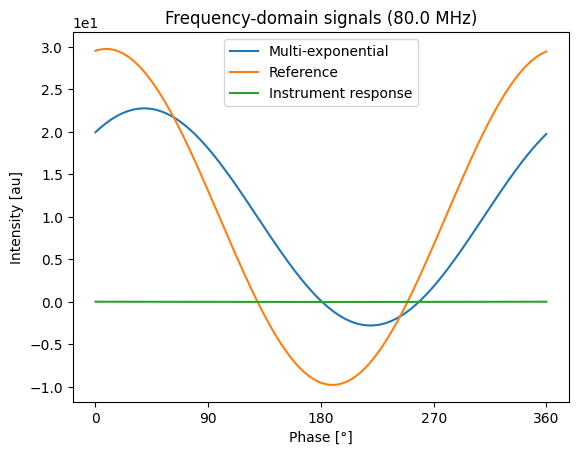

In [ ]:
# Conversion from time points to phase angles
c_f = 1e-3                  # Conversion factor

T = 1 / (frequency * c_f)   # Frequency to Period in ns
phase = (times / T) * 360   # Time to phase angle in degrees

#phase = numpy.linspace(0.0, 360.0, times.size)

fig, ax = pyplot.subplots()
ax.set(
    title=f'Frequency-domain signals ({frequency} MHz)',
    xlabel='Phase [°]',
    ylabel='Intensity [au]',
    xticks=[0, 90, 180, 270, 360],
)
ax.plot(phase, signal_multi, label='Multi-exponential')
#ax.plot(phase, signal, label='Multi-exponential')
ax.plot(phase, reference_signal, label='Reference')
ax.plot(phase, instrument_response, label='Instrument response')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()
pyplot.show()

# Frequency-domain, single-exponential #

In [ ]:
signal_mono, _, _ = lifetime_to_signal(frequency, lifetimes, harmonic=1, **settings)
signal_1 = signal_mono[1] #Fluorophore with tau_4
signal_2 = signal_mono[0] #Fluorophore with tau_2
#signal_3 = signal_mono[2]
#signal_4 = signal_mono[3]
#verify_signal(fractions, signal_mono)

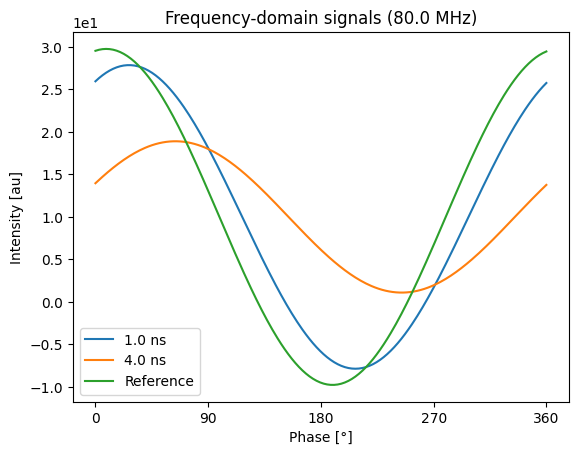

In [ ]:
fig, ax = pyplot.subplots()
ax.set(
    title=f'Frequency-domain signals ({frequency} MHz)',
    xlabel='Phase [°]',
    ylabel='Intensity [au]',
    xticks=[0, 90, 180, 270, 360],
)
ax.plot(phase, signal_mono.T, label=[f'{t} ns' for t in lifetimes])
ax.plot(phase, reference_signal, label='Reference')
#ax.plot(phase, instrument_response, label='Instrument response')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()
pyplot.show()

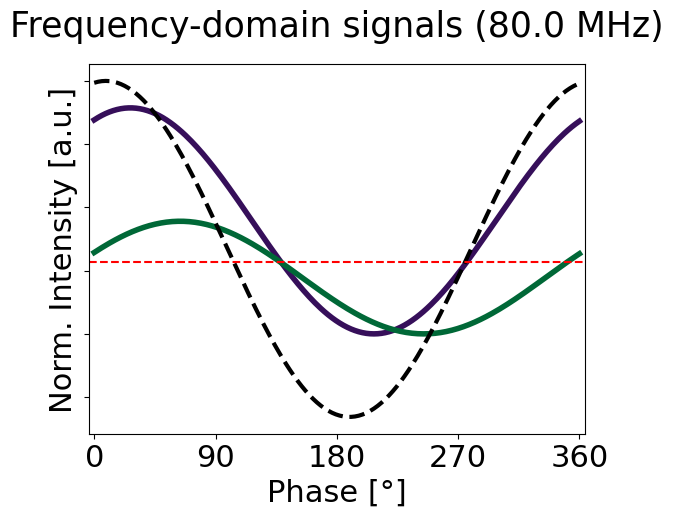

0.2857142857142857


In [ ]:
purple = '#360f5a'
green = '#006837'
line = 4
irf_line = 3
legend = 20
title = 25
axistitle = 22
ticksize = 22

# No negative intensities

ref =  -np.min(instrument_response)
signal_2_plot = signal_2 + ref - np.min(signal_2)
signal_1_plot = signal_1 + ref - np.min(signal_1)
reference_signal_plot = reference_signal


#Normalization

w = (2*np.pi) / period
mod_2 = 1 / np.sqrt((1 + (w*tau_4)**2))
mod_1 = 1 / np.sqrt((1 + (w*tau_2)**2))

norm_signal_1 = signal_1_plot / np.max(signal_1_plot) * mod_2
norm_signal_2 = signal_2_plot / np.max(signal_2_plot) * mod_1
norm_reference_signal = reference_signal_plot / np.max(reference_signal_plot)
average = np.mean(reference_signal_plot)/35
#Plot figure

fig, ax = pyplot.subplots()

ax.set(
    xticks=[0, 90, 180, 270, 360],
)

ax.set_title(f'Frequency-domain signals ({frequency} MHz)', fontsize=title, pad = 20) # Set title fontsize
#ax.set_title(f'Frequency-domain signals', fontsize=title) # Set title fontsize
ax.set_xlabel('Phase [°]', fontsize=axistitle)  # Set x-axis label fontsize
ax.set_ylabel('Norm. Intensity [a.u.]', fontsize=axistitle)  # Set y-axis label fontsize


ax.plot(phase, norm_signal_2, label= '{:.1f} ns'.format(tau_2), color = purple, linewidth = line)
ax.plot(phase, norm_signal_1, label= '{:.1f} ns'.format(tau_4), color = green, linewidth = line)
ax.plot(phase, norm_reference_signal, label='ref. signal', color = 'k', linewidth = irf_line, linestyle = '--')
#ax.plot(phase, instrument_response, label='IRF', color = 'k', linewidth = irf_line, linestyle = '--')
ax.set_xlim(-4, 364)
#ax.set_ylim(-0.35, 1.1)
plt.axhline(y=average, color='r', linestyle='--')
#ax.legend(fontsize = legend)
ax.tick_params(axis='x', labelsize=ticksize)
ax.tick_params(axis='y', labelleft= False, labelsize=ticksize)    #To remove the tick labels then write labelleft =False
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#pyplot.axis('off')
pyplot.show()
print(average)

# Phasor coordinates from Lifetime #

In [ ]:
from phasorpy.phasor import phasor_from_signal
from phasorpy.lifetime import phasor_calibrate
from phasorpy.plot import PhasorPlot

# Transform the synthetic signals to the phasor space
mean, real, imag = phasor_from_signal(signal_mono)

# Transform reference signal to phasor space
reference_mean, reference_real, reference_imag = phasor_from_signal(
    reference_signal)

# Calibrate phasor coordinates using reference
real, imag = phasor_calibrate(real, imag, reference_mean, reference_real, reference_imag,
                              frequency=frequency,
                              lifetime=reference_lifetime)

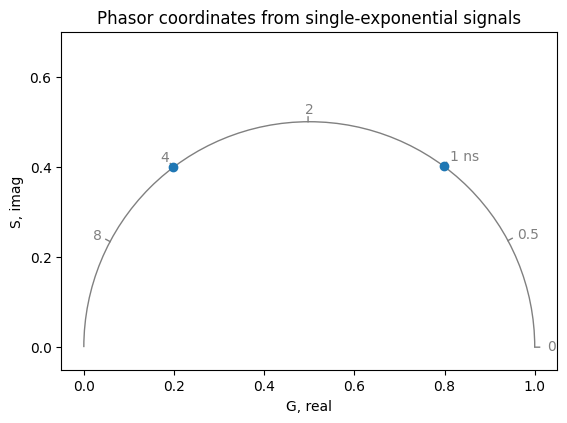

In [ ]:
from phasorpy.plot import PhasorPlot

# Plot calibrated phasor coordinates generated from synthetic signal
plotty = True
if plotty:
  plot = PhasorPlot(frequency = frequency,
                    title='Phasor coordinates from single-exponential signals')
  plot.plot(real, imag)
  plot.show()

## Create an FD emission stack with two fluorophores exhibiting different lifetimes ##

(127, 127, 256)


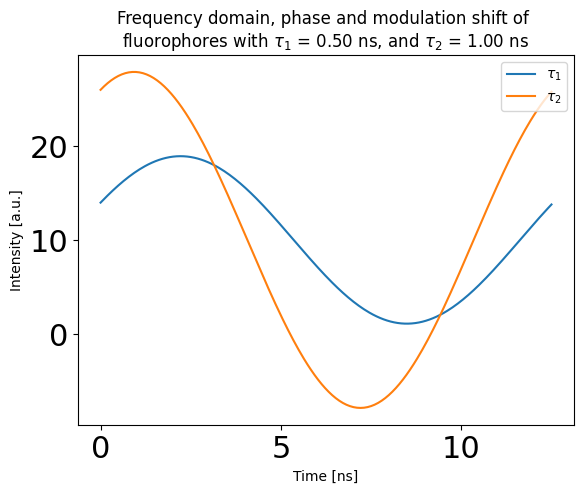

In [ ]:
t_dim = settings['samples']
# Create fluorescence data stacks initialized to zero
F1xy = np.zeros((y_dim, x_dim, t_dim))
F2xy = np.zeros((y_dim, x_dim, t_dim))
F1xy[cy, cx_1, :] = signal_mono.T[:,1] #Left Fluorophore with 1ns
F2xy[cy, cx_2, :] = signal_mono.T[:,0] #Right Fluorophore with 4ns

print(F1xy.shape)

# Create figure and axis
fig, ax = plt.subplots()

# Define the title, labels, and formatting
ax.set(
    title=f'Frequency domain, phase and modulation shift of \nfluorophores with $\\tau_1$ = {tau_1:.2f} ns, and $\\tau_2$ = {tau_2:.2f} ns',
    xlabel='Time [ns]',
    ylabel='Intensity [a.u.]',
)

# Plot fluorophore signals
ax.plot(times, F1xy[cy, cx_1, :], label='$\\tau_1$')
ax.plot(times, F2xy[cy, cx_2, :], label='$\\tau_2$')

# Customize ticks
ax.tick_params(axis='x', labelsize=ticksize)
ax.tick_params(axis='y', labelsize=ticksize)

# Add legend
ax.legend(loc=1)

# Display the plot
plt.show()

Crea

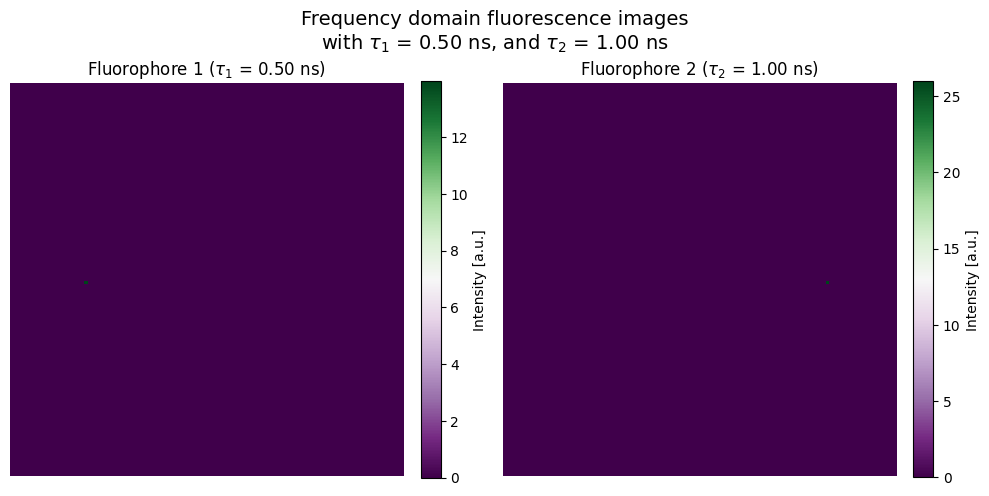

In [ ]:
# Create figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Two side-by-side subplots

# Define titles using fluorophore lifetimes
title_1 = f'Fluorophore 1 ($\\tau_1$ = {tau_1:.2f} ns)'
title_2 = f'Fluorophore 2 ($\\tau_2$ = {tau_2:.2f} ns)'

# Plot F1xy (Frame 0) with raw intensities
im1 = axes[0].imshow(F1xy[:, :, 0], cmap=color)
axes[0].set_title(title_1)

# Plot F2xy (Frame 0) with raw intensities
im2 = axes[1].imshow(F2xy[:, :, 0], cmap=color)
axes[1].set_title(title_2)

# Add colorbars for both images
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Intensity [a.u.]")
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Intensity [a.u.]")

# Remove axis ticks for better visualization
for ax in axes:
    ax.axis("off")

# Set overall figure title using fluorophore lifetimes
fig.suptitle(f'Frequency domain fluorescence images\nwith $\\tau_1$ = {tau_1:.2f} ns, and $\\tau_2$ = {tau_2:.2f} ns', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

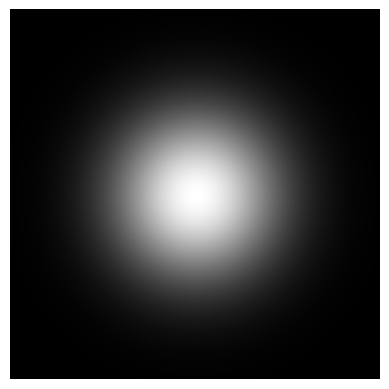

In [ ]:
import scipy.signal
# Create a Gaussian-like PSF
def gaussian_psf(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)
    psf = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    psf /= np.sum(psf)  # Normalize PSF
    return psf

# Define PSF size and sigma
sigma_psf = sigma_px  # Standard deviation of PSF

# Generate PSF
PSF = gaussian_psf(x_dim, sigma_psf)
plt.imshow(PSF, cmap="gray")
plt.axis('off')

# Convolve each frame in the (x, y, t) stack
F1xy_convolved = np.empty_like(F1xy)
F2xy_convolved = np.empty_like(F2xy)

for t in range(t_dim):
    F1xy_convolved[:, :, t] = scipy.signal.fftconvolve(F1xy[:, :, t], PSF, mode='same')
    F2xy_convolved[:, :, t] = scipy.signal.fftconvolve(F2xy[:, :, t], PSF, mode='same')

## FD signals at different pixel positions after the convolution with PSF ##

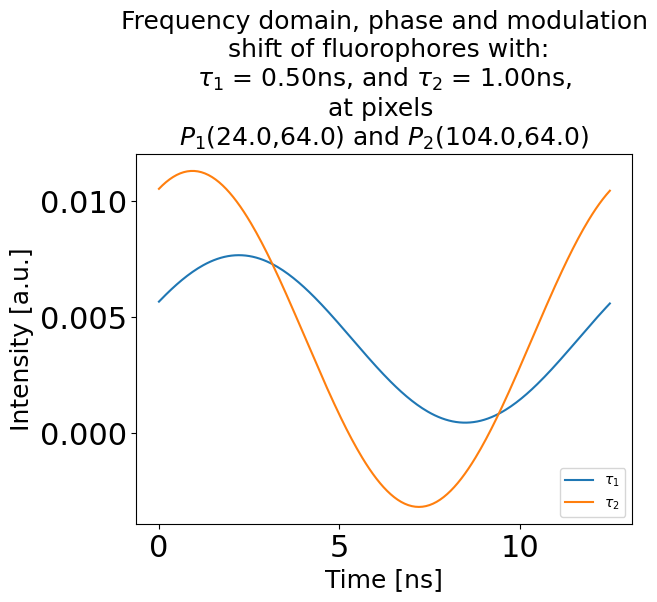

In [67]:
# Pixel labeling. The signal values as a function of position.
# Select any pixel around the center

dx_1 = 0                   # For mathematical construction to move X_1 to the right, use negative numbers
dx_2 = 0
dy_1 = 0
dy_2 = 0
X_1 = cx_1 - dx_1
X_2 = cx_2 + dx_2
Y_1 = cy + dy_1
Y_2 = cy + dy_2

#plt.plot(E_t, linestyle ='--', label = 'Excitation')
plt.plot(times, F1xy_convolved[Y_1, X_1, :], label = '$\u03C4_1$')
plt.plot(times, F2xy_convolved[Y_2, X_2, :], label = '$\u03C4_2$')
plt.title('Frequency domain, phase and modulation\n shift of the simulated fluorophores with:\n$\u03c4_1$ = {:.2f}ns, and $\u03C4_2$ = {:.2f}ns,\nat pixels \n$P_1$({:.1f},{:.1f}) and $P_2$({:.1f},{:.1f})'.format(tau_1, tau_2, X_1, Y_1, X_2, Y_2),  fontsize = title_size)
plt.xlabel('Time [ns]', fontsize = axtitles)
plt.ylabel('Intensity [a.u.]', fontsize = axtitles)
plt.tick_params(axis='x', labelsize = ticksize)
plt.tick_params(axis='y', labelsize = ticksize)
plt.legend(loc = 4)
plt.show()

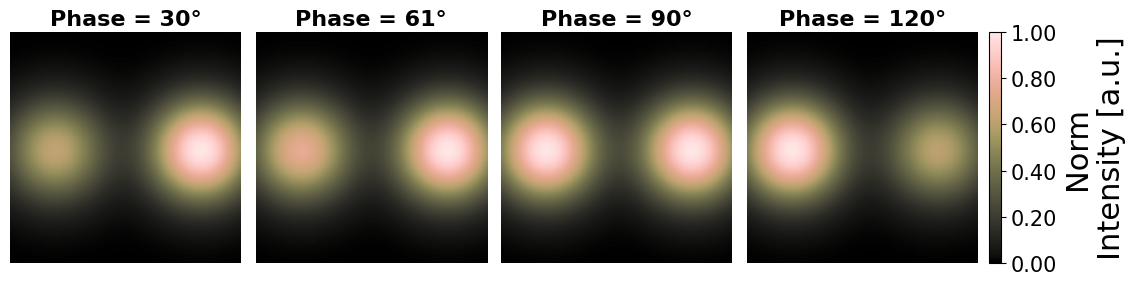

In [98]:
# Parameters
fr = 6  # Fixed reference frame
step = 3  # Step size
times_to_display = [1.05, 2.08, 3.11, 4.166667]  # Frames to display
phases_to_display = []

for time in times_to_display:
                    phases_to_display.append(np.round((time / period) * 360))
# Find the closest index for each value in phases_to_display
indices = [np.abs(phase - p).argmin() for p in phases_to_display]
# Import libraries
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

# Define display settings
labelsize = 15
font = 22
color = 'cmc.turku'
title = 16
weight = 'bold'

# Create figure with custom grid layout
fig = plt.figure(figsize=(13, 3))
gs = gridspec.GridSpec(1, 6, width_ratios=[1, 1, 1, 1, 0.05, 0.02], wspace=0.05)

# Add subplots for the 4 images
axes = [fig.add_subplot(gs[0, i]) for i in range(4)]

# Plot the selected images
for ax, i in zip(axes, indices):
    montage_frame = F1xy_convolved[:, :, i] + F2xy_convolved[:, :, i]
    norm_montage_frame = montage_frame / np.max(montage_frame)
    im = ax.imshow(norm_montage_frame, cmap=color)
    ax.set_title(f"Phase = {round(phase[i])}°", fontsize=title, pad=5, fontweight=weight)
    ax.axis("off")  # Remove axes for clean visualization

# Add colorbar in its own subplot cell
cax = fig.add_subplot(gs[0, 4])
cbar = fig.colorbar(im, cax=cax)

# Customize the colorbar
cbar.ax.yaxis.set_ticks_position('right')  # Move ticks to the right side
cbar.ax.yaxis.set_tick_params(left=False, labelleft=False)  # Remove left ticks and labels
cbar.ax.tick_params(labelsize=labelsize)
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
cbar.set_label('Norm\nIntensity [a.u.]', fontsize=font)

# Show final figure
plt.show()


## Analyse the modelled FD-FLIM signal ##

### Synthesize a TD-FLIM reference signal, taking as an example a homogeneous solution of fluorescein with a lifetime of 4.2 ns. ###

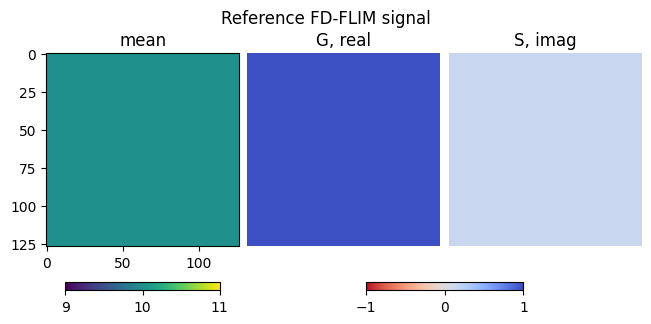

In [68]:
img_reference_signal = np.zeros((y_dim, x_dim, t_dim))

for x in range(img_reference_signal.shape[0]):  # Loop over x-dimension
    for y in range(img_reference_signal.shape[1]):  # Loop over y-dimension
        img_reference_signal[y, x, :] = reference_signal  # Assign time-domain signal

#assert reference_signal.attrs['frequency'] == frequency
img_reference_mean, img_reference_real, img_reference_imag = phasor_from_signal(
    img_reference_signal
)

from phasorpy.plot import plot_phasor_image
plot_phasor_image(
    img_reference_mean, img_reference_real, img_reference_imag, title='Reference FD-FLIM signal'
)


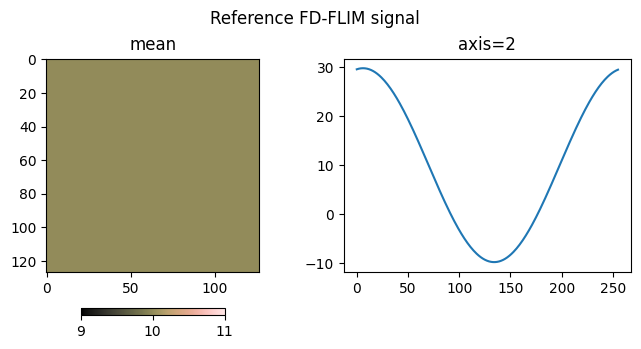

In [69]:
from phasorpy.plot import plot_signal_image

plot_signal_image(img_reference_signal, title='Reference FD-FLIM signal', cmap = color)

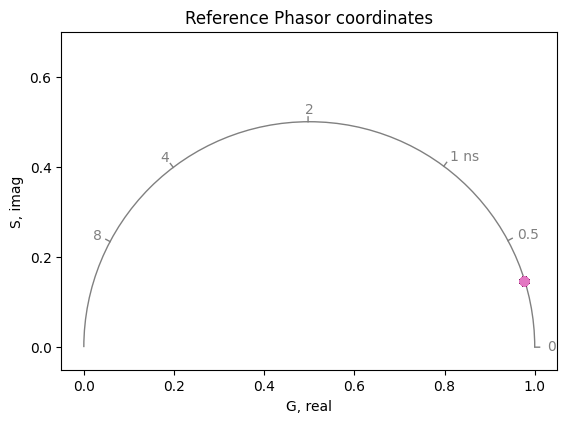

In [70]:
# Plot calibration phasor coordinates generated from synthetic signal
plotty = True
if plotty:
  plot = PhasorPlot(frequency = frequency,
                    title='Reference Phasor coordinates')
  plot.plot(img_reference_real, img_reference_imag)
  plot.show()

### Calibrate ###

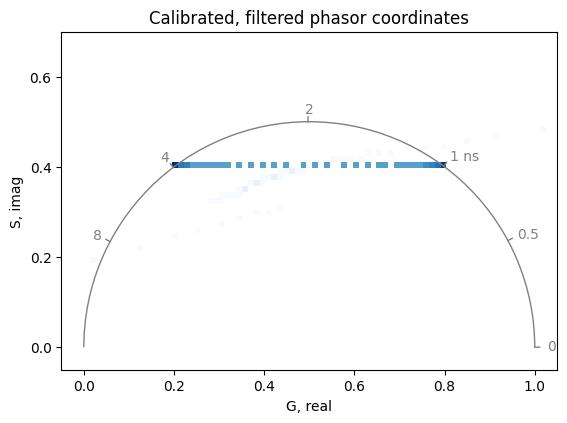

In [71]:
FD_FLIM_img =F1xy_convolved + F2xy_convolved

mean, real, imag = phasor_from_signal(FD_FLIM_img, axis = 2)


# Calibrate phasor coordinates using reference
real, imag = phasor_calibrate(real, imag, img_reference_mean, img_reference_real, img_reference_imag,
                              frequency=frequency,
                              lifetime=reference_lifetime)


phasorplot = PhasorPlot(
    frequency=frequency, title='Calibrated, filtered phasor coordinates'
)
phasorplot.hist2d(real, imag, bins = 85)

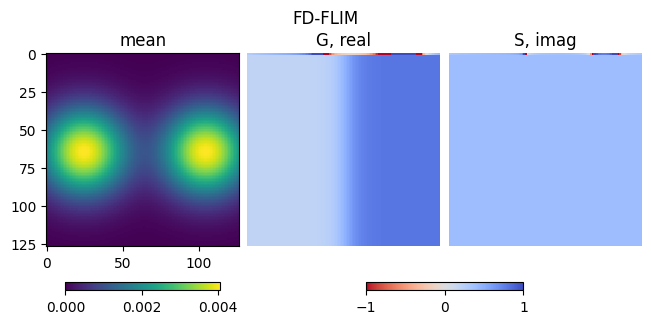

In [72]:
color = 'PRGn'
from phasorpy.plot import plot_phasor_image

resolved_FLIM = plot_phasor_image(
    mean, real, imag, title='FD-FLIM'
)

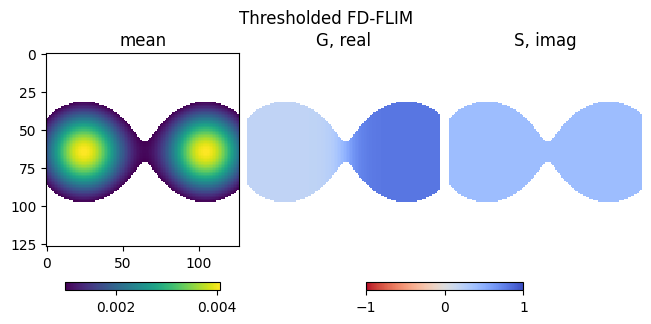

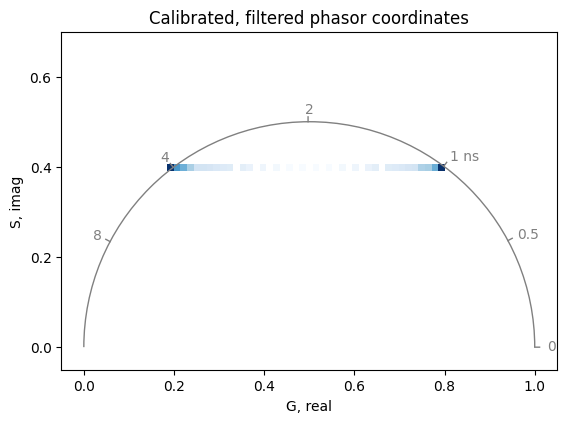

In [ ]:
from phasorpy.phasor import phasor_threshold

mean_th, real_th, imag_th = phasor_threshold(mean, real, imag, mean_min=0.001)
plot_phasor_image(
    mean_th, real_th, imag_th, title='Thresholded FD-FLIM'
)
phasorplot = PhasorPlot(
    frequency=frequency, title='Calibrated, filtered phasor coordinates'
)
phasorplot.hist2d(real_th, imag_th, bins = 75)

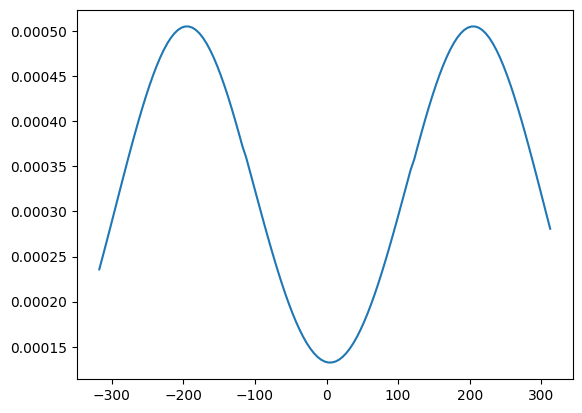

In [ ]:
plt.plot(np.arange(-x_dim/2,x_dim/2)*pxsz,mean[cx_1,:])

In [ ]:
import numpy
from matplotlib import pyplot

from phasorpy.datasets import fetch
from phasorpy.io import phasor_from_simfcs_referenced
from phasorpy.lifetime import (
    lifetime_fraction_from_amplitude,
    lifetime_to_signal,
    phasor_filter_median,
    phasor_from_fret_donor,
    phasor_from_lifetime,
    phasor_threshold,
    phasor_to_apparent_lifetime,
    phasor_to_polar,
)
from phasorpy.plot import (
    PhasorPlot,
    plot_phasor,
    plot_phasor_image,
    plot_polar_frequency,
)


frequency = 80.0  # MHz
lifetimes = [4.0, 2.0, 1.0, 0.5]  # ns
amplitudes = [0.25, 0.25, 0.25, 0.25]  # pre-exponential amplitudes

phasor_single = phasor_from_lifetime(frequency, lifetimes)
phasor_combined = phasor_from_lifetime(
    frequency, lifetimes, amplitudes, preexponential=True
)

plot = PhasorPlot(frequency=frequency)
plot.components(
    *phasor_single, lifetime_fraction_from_amplitude(lifetimes, amplitudes)
)
plot.plot(*phasor_single, label='single-exponential components')
plot.plot(*phasor_combined, label='multi-exponential components')
plot.show()

ImportError: cannot import name 'phasor_threshold' from 'phasorpy.lifetime' (/usr/local/lib/python3.12/dist-packages/phasorpy/lifetime.py)